# Setup

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


# Data Preparation

## Load Data

In [ ]:
pd.set_option('display.max_columns', 50, 'display.width', 200)
df = pd.read_csv('input/datasets/Unicorns_Completed (2024).csv')


## Data Cleaning

In [ ]:
import re
def convert_years_months(s):
    m = re.match(r'(\d+)y?\s?(\d+)m?o?', s)
    return f'{m[1]}y{m[2]}m' if m else s

df['Years to Unicorn'] = df['Years to Unicorn'].apply(convert_years_months)

def correct_industry_labels(s):
    if s == 'Health':
        return 'Healthcare & Life Sciences'
    if s == 'West Palm Beach':
        return 'Enterprise Tech'
    return s

df['Industry'] = df['Industry'].apply(correct_industry_labels)


## Prepare Data

In [ ]:
df['Unicorn Date'] = pd.to_datetime(df['Unicorn Date'])
df['Valuation ($B)'] = pd.to_numeric(df['Valuation ($B)'])
df['Unicorn Year'] = df['Unicorn Date'].dt.year
df['Funding ($B)'] = df['Total Equity Funding ($)'] / 1e9


## Preview Data

In [ ]:
df.head()


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Company</th>
      <th>Valuation ($B)</th>
      <th>Total Equity Funding ($)</th>
      <th>Unicorn Date</th>
      <th>Date Founded</th>
      <th>Years to Unicorn</th>
      <th>Industry</th>
      <th>Country</th>
      <th>City</th>
      <th>Select Investors</th>
      <th>Unicorn Year</th>
      <th>Funding ($B)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>SpaceX</td>
      <td>350.0</td>
      <td>9000000000</td>
      <td>2012-12-01</td>
      <td>2002</td>
      <td>10y3m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>Hawthorne</td>
      <td>Opus Capital, RRE Ventures, Relay Ventures</td>
      <td>2012</td>
      <td>9.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ByteDance</td>
      <td>300.0</td>
      <td>8000000000</td>
      <td>2017-04-07</td>
      <td>2011</td>
      <td>6y3m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Breyer Capital, Parkway VC, TIME Ventures</td>
      <td>2017</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>OpenAI</td>
      <td>157.0</td>
      <td>18000000000</td>
      <td>2019-07-22</td>
      <td>2015</td>
      <td>4y6m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Dynamo VC, Susa Ventures, Founders Fund</td>
      <td>2019</td>
      <td>18.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Ant Group</td>
      <td>150.0</td>
      <td>19000000000</td>
      <td>2017-01-01</td>
      <td>2014</td>
      <td>3y</td>
      <td>Financial Services</td>
      <td>China</td>
      <td>Hangzhou</td>
      <td>Alibaba Group, CPP Investments, The Carlyle Group</td>
      <td>2017</td>
      <td>19.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Stripe</td>
      <td>70.0</td>
      <td>9000000000</td>
      <td>2014-01-23</td>
      <td>2009</td>
      <td>5y</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Sequoia Capital China, ZhenFund, K2 Ventures</td>
      <td>2014</td>
      <td>9.0</td>
    </tr>
  </tbody>
</table>
</div>

# Descriptive Analysis

## Distribution

### Valuations

1.  Distribution of Valuations across Different Industries

    ``` python
    # Group by industry and sum valuations
    industry_valuation_df = df.groupby('Industry')['Valuation ($B)'].sum().reset_index().sort_values('Valuation ($B)', ascending=False)
    industry_valuation_df
    ```

    <div>
    <style scoped>
        .dataframe tbody tr th:only-of-type {
            vertical-align: middle;
        }

        .dataframe tbody tr th {
            vertical-align: top;
        }

        .dataframe thead th {
            text-align: right;
        }
    </style>
    <table border="1" class="dataframe">
      <thead>
        <tr style="text-align: right;">
          <th></th>
          <th>Industry</th>
          <th>Valuation ($B)</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th>1</th>
          <td>Enterprise Tech</td>
          <td>1762.04</td>
        </tr>
        <tr>
          <th>2</th>
          <td>Financial Services</td>
          <td>760.16</td>
        </tr>
        <tr>
          <th>4</th>
          <td>Industrials</td>
          <td>678.55</td>
        </tr>
        <tr>
          <th>0</th>
          <td>Consumer &amp; Retail</td>
          <td>593.30</td>
        </tr>
        <tr>
          <th>3</th>
          <td>Healthcare &amp; Life Sciences</td>
          <td>399.95</td>
        </tr>
        <tr>
          <th>6</th>
          <td>Media &amp; Entertainment</td>
          <td>200.29</td>
        </tr>
        <tr>
          <th>5</th>
          <td>Insurance</td>
          <td>117.06</td>
        </tr>
      </tbody>
    </table>
    </div>

    ``` python
    plt.figure(figsize=(12, 6))
    plt.barh(industry_valuation_df['Industry'], industry_valuation_df['Valuation ($B)'], color='skyblue')
    plt.title('Distribution of Valuations across Different Industries')
    plt.xlabel('Total Valuation ($B)')
    plt.ylabel('Industry')
    plt.grid(axis='x', alpha=0.75)
    ```

    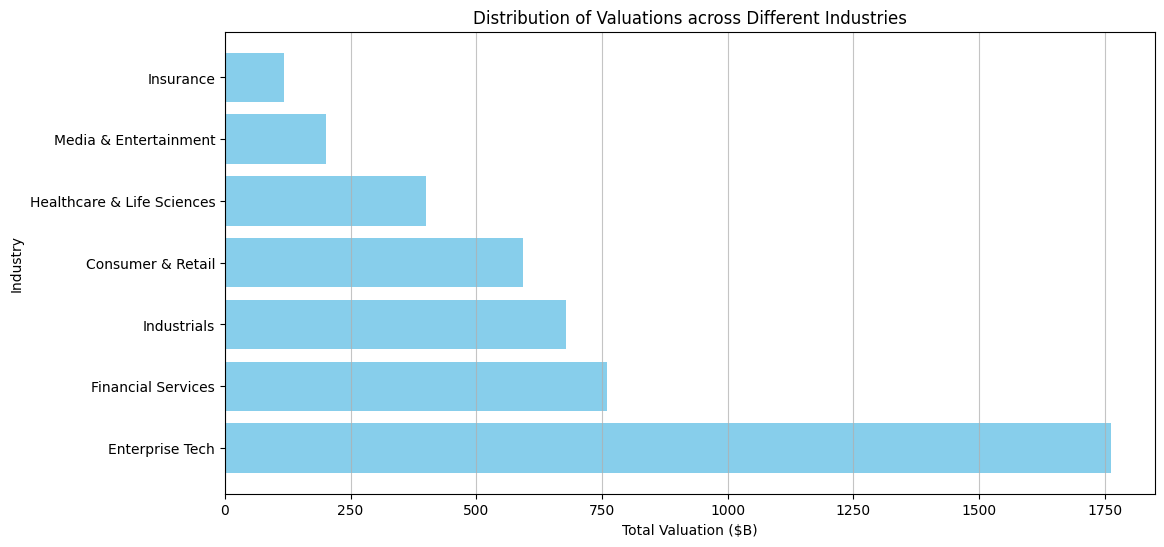

2.  Distribution of Valuations across Different Countries

    ``` python
    # Group by Country and sum valuations
    country_valuation_df = df.groupby('Country')['Valuation ($B)'].sum().reset_index().sort_values('Valuation ($B)', ascending=False).head(20)
    country_valuation_df
    ```

    <div>
    <style scoped>
        .dataframe tbody tr th:only-of-type {
            vertical-align: middle;
        }

        .dataframe tbody tr th {
            vertical-align: top;
        }

        .dataframe thead th {
            text-align: right;
        }
    </style>
    <table border="1" class="dataframe">
      <thead>
        <tr style="text-align: right;">
          <th></th>
          <th>Country</th>
          <th>Valuation ($B)</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th>53</th>
          <td>United States</td>
          <td>2564.14</td>
        </tr>
        <tr>
          <th>10</th>
          <td>China</td>
          <td>835.65</td>
        </tr>
        <tr>
          <th>52</th>
          <td>United Kingdom</td>
          <td>197.35</td>
        </tr>
        <tr>
          <th>24</th>
          <td>India</td>
          <td>172.07</td>
        </tr>
        <tr>
          <th>43</th>
          <td>Singapore</td>
          <td>92.06</td>
        </tr>
        <tr>
          <th>21</th>
          <td>Germany</td>
          <td>85.90</td>
        </tr>
        <tr>
          <th>20</th>
          <td>France</td>
          <td>70.86</td>
        </tr>
        <tr>
          <th>27</th>
          <td>Israel</td>
          <td>56.22</td>
        </tr>
        <tr>
          <th>6</th>
          <td>Canada</td>
          <td>56.00</td>
        </tr>
        <tr>
          <th>1</th>
          <td>Australia</td>
          <td>48.84</td>
        </tr>
        <tr>
          <th>5</th>
          <td>Brazil</td>
          <td>34.13</td>
        </tr>
        <tr>
          <th>45</th>
          <td>South Korea</td>
          <td>31.34</td>
        </tr>
        <tr>
          <th>47</th>
          <td>Sweden</td>
          <td>29.42</td>
        </tr>
        <tr>
          <th>36</th>
          <td>Netherlands</td>
          <td>24.46</td>
        </tr>
        <tr>
          <th>35</th>
          <td>Mexico</td>
          <td>18.70</td>
        </tr>
        <tr>
          <th>19</th>
          <td>Finland</td>
          <td>14.91</td>
        </tr>
        <tr>
          <th>3</th>
          <td>Belgium</td>
          <td>11.95</td>
        </tr>
        <tr>
          <th>42</th>
          <td>Seychelles</td>
          <td>11.80</td>
        </tr>
        <tr>
          <th>26</th>
          <td>Ireland</td>
          <td>11.05</td>
        </tr>
        <tr>
          <th>29</th>
          <td>Japan</td>
          <td>10.82</td>
        </tr>
      </tbody>
    </table>
    </div>

    ``` python
    plt.figure(figsize=(12, 8))
    plt.barh(country_valuation_df['Country'], country_valuation_df['Valuation ($B)'])
    plt.title('Distribution of Valuations across Different Countries')
    plt.xlabel('Total Valuation ($B)')
    plt.ylabel('Countries')
    plt.grid(axis='x', alpha=0.75)
    plt.show()
    ```

    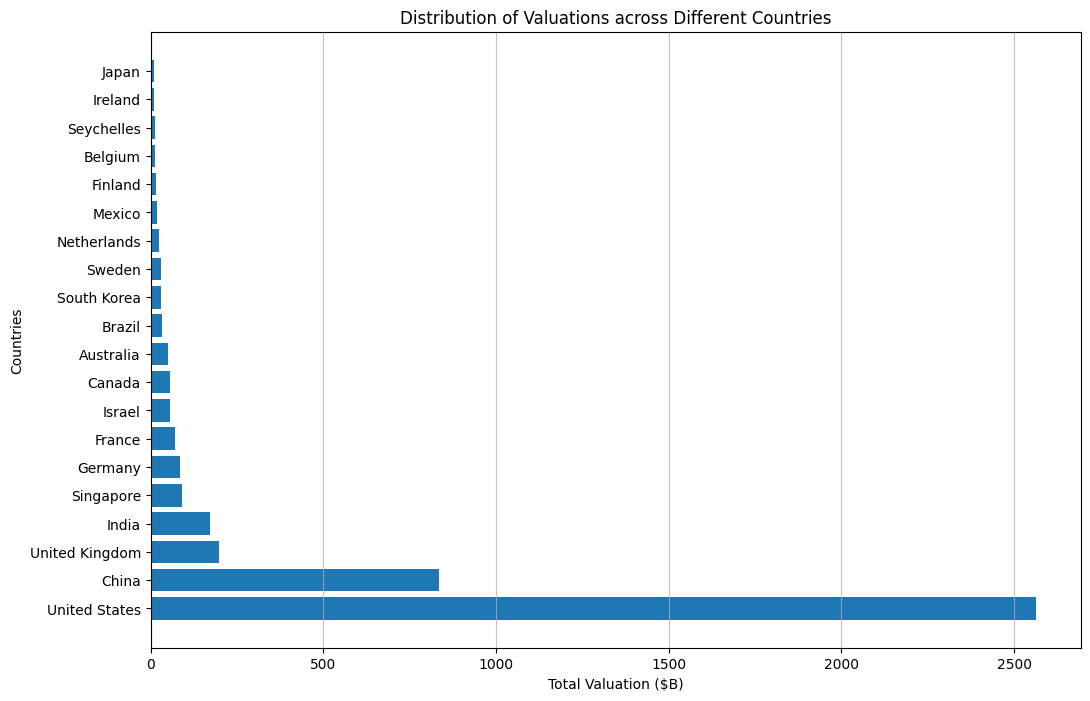

3.  Distribution of Valuations by Number of Companies

    ``` python
    # Define the bins for valuation ranges
    bins = [0, 1, 1.5, 2, 3, 4, 5, 6, 8, 10, 20, 30, 50, 100, 200, 300, 400]
    labels =  [f'{a}-{b}' for a, b in zip(bins[:-1], bins[1:])]
    cuts = pd.cut(df['Valuation ($B)'], bins=bins, labels=labels)

    # Count the number of companies in each bin
    valuation_distribution = cuts.value_counts().sort_index()

    # Plot the Bar Chart
    plt.figure(figsize=(12, 6))
    ax = valuation_distribution.plot(kind='bar', color='skyblue')
    ax.bar_label(ax.containers[0])
    plt.title('Distribution of Valuations by Number of Companies')
    plt.xlabel('Valuation ($B)')
    plt.ylabel('Number of Companies')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.yscale('log')
    plt.show()
    ```

    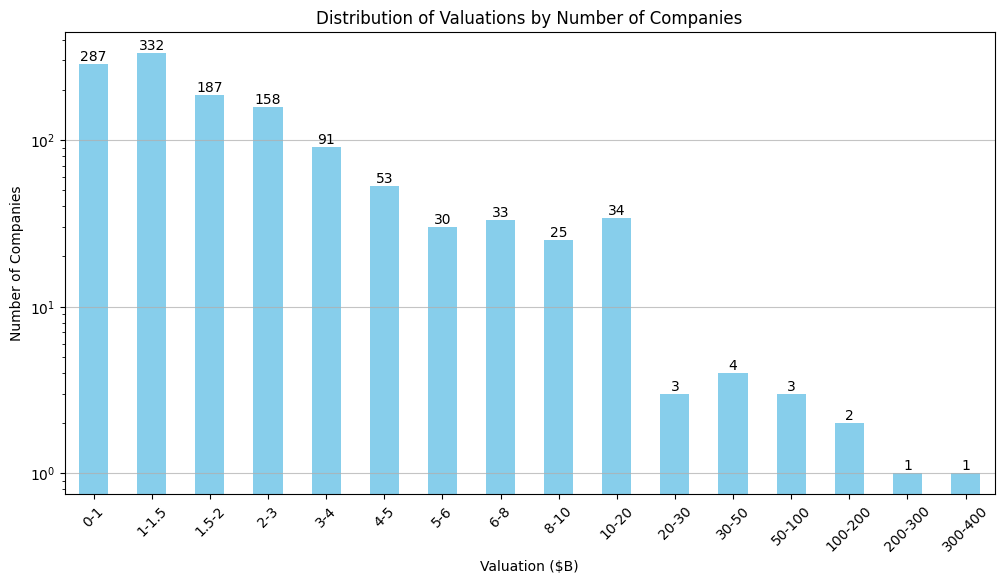

### Funding

1.  Distribution of Funding across Different Industries

    ``` python
    # Group by industry and sum valuations
    industry_funding_df = df.groupby('Industry')['Funding ($B)'].sum().reset_index().sort_values('Funding ($B)', ascending=False)
    industry_funding_df
    ```

    <div>
    <style scoped>
        .dataframe tbody tr th:only-of-type {
            vertical-align: middle;
        }

        .dataframe tbody tr th {
            vertical-align: top;
        }

        .dataframe thead th {
            text-align: right;
        }
    </style>
    <table border="1" class="dataframe">
      <thead>
        <tr style="text-align: right;">
          <th></th>
          <th>Industry</th>
          <th>Funding ($B)</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th>1</th>
          <td>Enterprise Tech</td>
          <td>254.609</td>
        </tr>
        <tr>
          <th>2</th>
          <td>Financial Services</td>
          <td>128.215</td>
        </tr>
        <tr>
          <th>4</th>
          <td>Industrials</td>
          <td>122.847</td>
        </tr>
        <tr>
          <th>0</th>
          <td>Consumer &amp; Retail</td>
          <td>116.818</td>
        </tr>
        <tr>
          <th>3</th>
          <td>Healthcare &amp; Life Sciences</td>
          <td>59.958</td>
        </tr>
        <tr>
          <th>6</th>
          <td>Media &amp; Entertainment</td>
          <td>49.003</td>
        </tr>
        <tr>
          <th>5</th>
          <td>Insurance</td>
          <td>13.096</td>
        </tr>
      </tbody>
    </table>
    </div>

    ``` python
    plt.figure(figsize=(12, 6))
    plt.barh(industry_funding_df['Industry'], industry_funding_df['Funding ($B)'], color='skyblue')
    plt.title('Distribution of Funding across Different Industries')
    plt.xlabel('Total Funding ($B)')
    plt.ylabel('Industry')
    plt.grid(axis='x', alpha=0.75)
    ```

    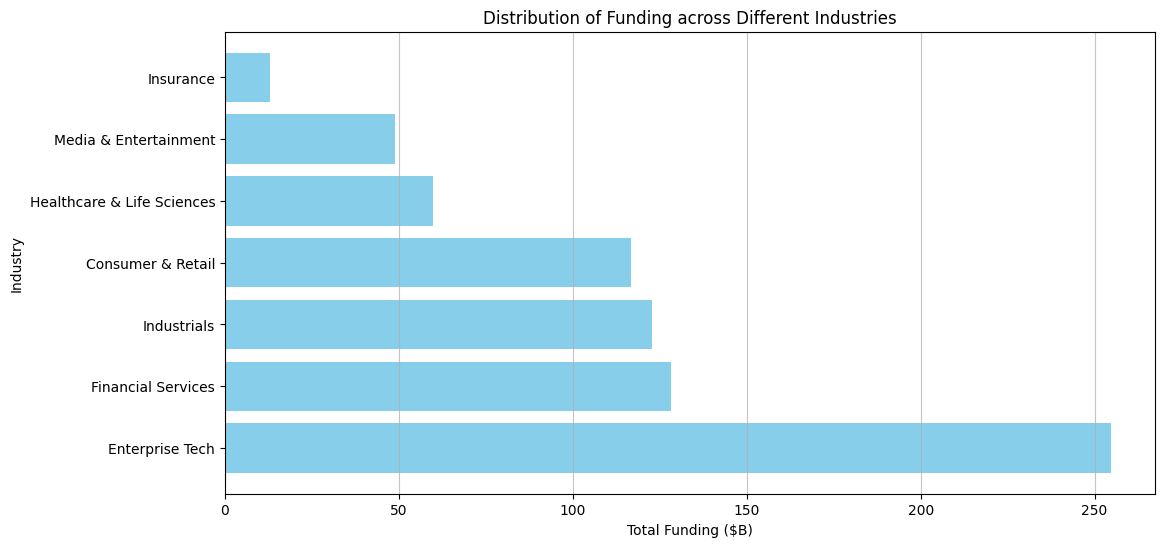

2.  Distribution of Funding across Different Countries

    ``` python
    # Group by Country and sum valuations
    country_funding_df = df.groupby('Country')['Funding ($B)'].sum().reset_index().sort_values('Funding ($B)', ascending=False).head(20)
    country_funding_df
    ```

    <div>
    <style scoped>
        .dataframe tbody tr th:only-of-type {
            vertical-align: middle;
        }

        .dataframe tbody tr th {
            vertical-align: top;
        }

        .dataframe thead th {
            text-align: right;
        }
    </style>
    <table border="1" class="dataframe">
      <thead>
        <tr style="text-align: right;">
          <th></th>
          <th>Country</th>
          <th>Funding ($B)</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <th>53</th>
          <td>United States</td>
          <td>402.858</td>
        </tr>
        <tr>
          <th>10</th>
          <td>China</td>
          <td>119.010</td>
        </tr>
        <tr>
          <th>24</th>
          <td>India</td>
          <td>44.207</td>
        </tr>
        <tr>
          <th>52</th>
          <td>United Kingdom</td>
          <td>34.566</td>
        </tr>
        <tr>
          <th>21</th>
          <td>Germany</td>
          <td>23.249</td>
        </tr>
        <tr>
          <th>20</th>
          <td>France</td>
          <td>15.458</td>
        </tr>
        <tr>
          <th>43</th>
          <td>Singapore</td>
          <td>11.893</td>
        </tr>
        <tr>
          <th>5</th>
          <td>Brazil</td>
          <td>10.591</td>
        </tr>
        <tr>
          <th>47</th>
          <td>Sweden</td>
          <td>10.433</td>
        </tr>
        <tr>
          <th>6</th>
          <td>Canada</td>
          <td>9.817</td>
        </tr>
        <tr>
          <th>27</th>
          <td>Israel</td>
          <td>8.695</td>
        </tr>
        <tr>
          <th>45</th>
          <td>South Korea</td>
          <td>4.607</td>
        </tr>
        <tr>
          <th>35</th>
          <td>Mexico</td>
          <td>4.268</td>
        </tr>
        <tr>
          <th>25</th>
          <td>Indonesia</td>
          <td>3.617</td>
        </tr>
        <tr>
          <th>1</th>
          <td>Australia</td>
          <td>3.475</td>
        </tr>
        <tr>
          <th>36</th>
          <td>Netherlands</td>
          <td>2.865</td>
        </tr>
        <tr>
          <th>11</th>
          <td>Colombia</td>
          <td>2.659</td>
        </tr>
        <tr>
          <th>23</th>
          <td>Hong Kong</td>
          <td>2.399</td>
        </tr>
        <tr>
          <th>29</th>
          <td>Japan</td>
          <td>2.347</td>
        </tr>
        <tr>
          <th>46</th>
          <td>Spain</td>
          <td>2.212</td>
        </tr>
      </tbody>
    </table>
    </div>

    ``` python
    plt.figure(figsize=(12, 8))
    plt.barh(country_funding_df['Country'], country_funding_df['Funding ($B)'])
    plt.title('Distribution of Funding across Different Countries')
    plt.xlabel('Total Valuation ($B)')
    plt.ylabel('Countries')
    plt.grid(axis='x', alpha=0.75)
    plt.show()
    ```

    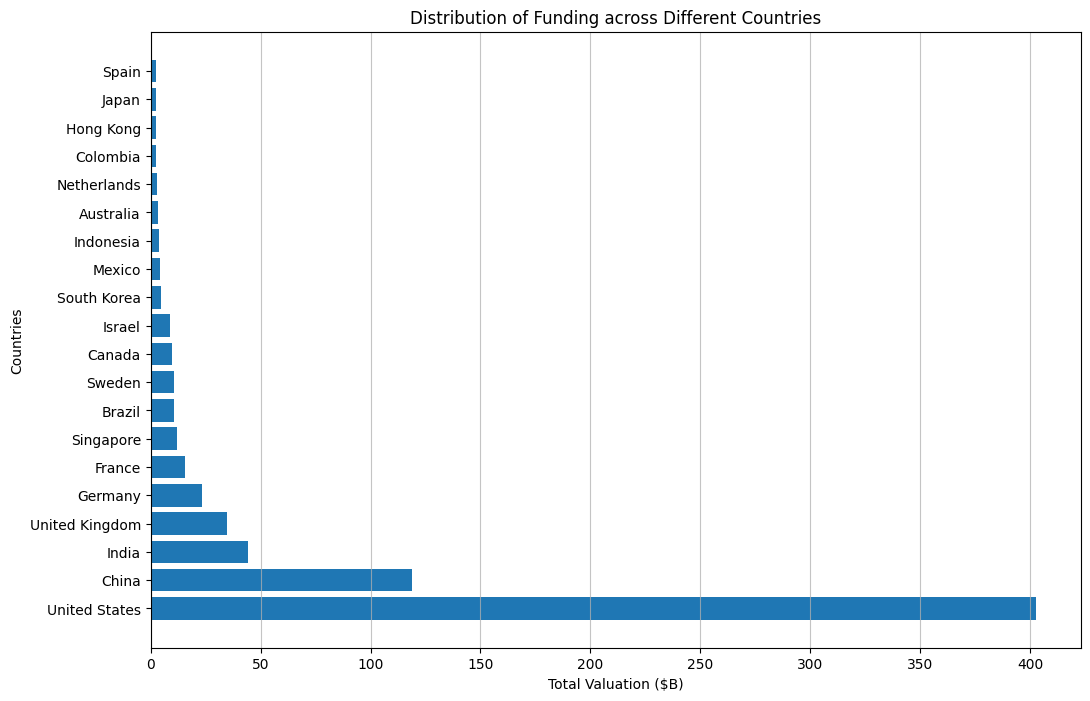

3.  Distribution of Funding by Number of Companies

    ``` python
    # Define the bins for funding ranges
    bins = [0, 0.2, 0.3, 0.5, 0.8, 1, 2, 4, 6, 8, 10, 12, 15, 20]
    labels =  [f'{a}-{b}' for a, b in zip(bins[:-1], bins[1:])]
    cuts = pd.cut(df['Funding ($B)'], bins=bins, labels=labels)

    # Count the number of companies in each bin
    funding_distribution = cuts.value_counts().sort_index()

    # Plot the Bar Chart
    plt.figure(figsize=(12, 6))
    ax = funding_distribution.plot(kind='bar', color='skyblue')
    ax.bar_label(ax.containers[0])
    plt.title('Distribution of Funding by Number of Companies')
    plt.xlabel('Funding ($B)')
    plt.ylabel('Number of Companies')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.yscale('log')
    plt.show()
    ```

    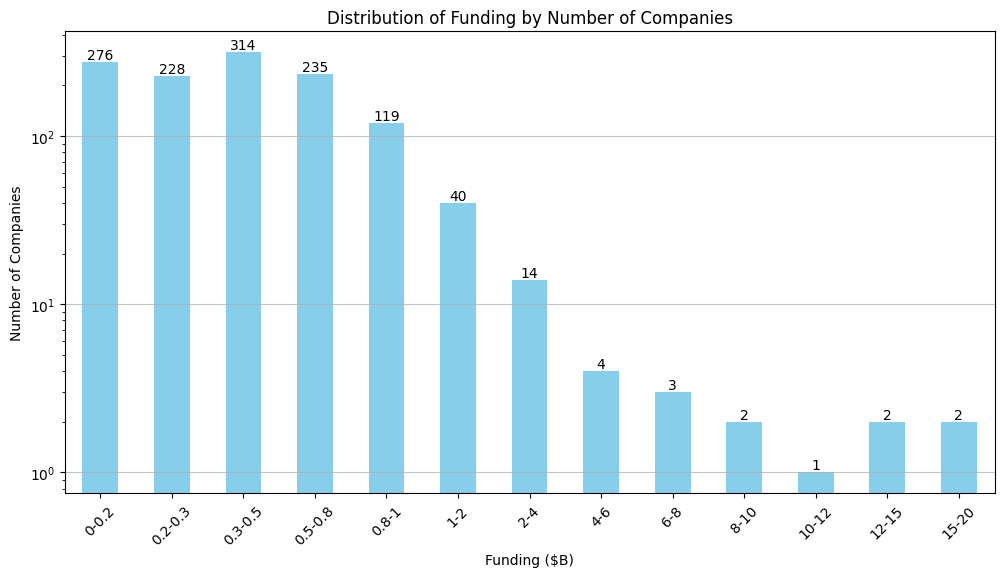

# Comparative Analysis

## By Company

### Top Companies by Valuation

In [ ]:
top_companies = df.sort_values(by='Valuation ($B)', ascending=False).head(20)
top_companies


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Company</th>
      <th>Valuation ($B)</th>
      <th>Total Equity Funding ($)</th>
      <th>Unicorn Date</th>
      <th>Date Founded</th>
      <th>Years to Unicorn</th>
      <th>Industry</th>
      <th>Country</th>
      <th>City</th>
      <th>Select Investors</th>
      <th>Unicorn Year</th>
      <th>Funding ($B)</th>
      <th>Years to Unicorn (Months)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>SpaceX</td>
      <td>350.00</td>
      <td>9000000000</td>
      <td>2012-12-01</td>
      <td>2002</td>
      <td>10y3m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>Hawthorne</td>
      <td>Opus Capital, RRE Ventures, Relay Ventures</td>
      <td>2012</td>
      <td>9.000</td>
      <td>123</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ByteDance</td>
      <td>300.00</td>
      <td>8000000000</td>
      <td>2017-04-07</td>
      <td>2011</td>
      <td>6y3m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Breyer Capital, Parkway VC, TIME Ventures</td>
      <td>2017</td>
      <td>8.000</td>
      <td>75</td>
    </tr>
    <tr>
      <th>2</th>
      <td>OpenAI</td>
      <td>157.00</td>
      <td>18000000000</td>
      <td>2019-07-22</td>
      <td>2015</td>
      <td>4y6m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Dynamo VC, Susa Ventures, Founders Fund</td>
      <td>2019</td>
      <td>18.000</td>
      <td>54</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Ant Group</td>
      <td>150.00</td>
      <td>19000000000</td>
      <td>2017-01-01</td>
      <td>2014</td>
      <td>3y</td>
      <td>Financial Services</td>
      <td>China</td>
      <td>Hangzhou</td>
      <td>Alibaba Group, CPP Investments, The Carlyle Group</td>
      <td>2017</td>
      <td>19.000</td>
      <td>36</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Stripe</td>
      <td>70.00</td>
      <td>9000000000</td>
      <td>2014-01-23</td>
      <td>2009</td>
      <td>5y</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Sequoia Capital China, ZhenFund, K2 Ventures</td>
      <td>2014</td>
      <td>9.000</td>
      <td>60</td>
    </tr>
    <tr>
      <th>5</th>
      <td>SHEIN</td>
      <td>66.00</td>
      <td>4000000000</td>
      <td>2018-07-03</td>
      <td>2008</td>
      <td>10y6m</td>
      <td>Financial Services</td>
      <td>Singapore</td>
      <td>Singapore</td>
      <td>369 Growth Partners, GTM Capital, Berkeley Hil...</td>
      <td>2018</td>
      <td>4.000</td>
      <td>126</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Databricks</td>
      <td>62.00</td>
      <td>14000000000</td>
      <td>2019-02-05</td>
      <td>2013</td>
      <td>6y1m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Holtzbrinck Ventures, Unternehmertum Venture C...</td>
      <td>2019</td>
      <td>14.000</td>
      <td>73</td>
    </tr>
    <tr>
      <th>7</th>
      <td>xAI</td>
      <td>50.00</td>
      <td>12000000000</td>
      <td>2024-05-26</td>
      <td>2006</td>
      <td>18y4m</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>Burlingame</td>
      <td>Prysm Capital, Baillie Gifford &amp; Co., TDM Grow...</td>
      <td>2024</td>
      <td>12.000</td>
      <td>220</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Revolut</td>
      <td>45.00</td>
      <td>2000000000</td>
      <td>2018-04-26</td>
      <td>2015</td>
      <td>3y3m</td>
      <td>Insurance</td>
      <td>United Kingdom</td>
      <td>London</td>
      <td>CMFG Ventures, Accomplice, Moderne Ventures</td>
      <td>2018</td>
      <td>2.000</td>
      <td>39</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Canva</td>
      <td>32.00</td>
      <td>580000000</td>
      <td>2018-01-08</td>
      <td>2012</td>
      <td>6y</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>Australia</td>
      <td>Surry Hills</td>
      <td>Index Ventures, Temasek, Portag3 Ventures</td>
      <td>2018</td>
      <td>0.580</td>
      <td>72</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Fanatics</td>
      <td>31.00</td>
      <td>5000000000</td>
      <td>2012-06-06</td>
      <td>2011</td>
      <td>1y5m</td>
      <td>Financial Services</td>
      <td>United States</td>
      <td>Jacksonville</td>
      <td>Liberty City Ventures, RRE Ventures, Mithril C...</td>
      <td>2012</td>
      <td>5.000</td>
      <td>17</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Chime</td>
      <td>25.00</td>
      <td>2000000000</td>
      <td>2019-03-05</td>
      <td>2012</td>
      <td>7y2m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Blackstone, ICONIQ Growth, General Atlantic</td>
      <td>2019</td>
      <td>2.000</td>
      <td>86</td>
    </tr>
    <tr>
      <th>12</th>
      <td>CoreWeave</td>
      <td>23.00</td>
      <td>2000000000</td>
      <td>2023-04-20</td>
      <td>2019</td>
      <td>4y3m</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>United States</td>
      <td>Roseland</td>
      <td>The Column Group, Foresite Capital, Foresite C...</td>
      <td>2023</td>
      <td>2.000</td>
      <td>51</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Epic Games</td>
      <td>22.50</td>
      <td>8000000000</td>
      <td>2018-10-26</td>
      <td>1991</td>
      <td>27y9m</td>
      <td>Financial Services</td>
      <td>United States</td>
      <td>Cary</td>
      <td>Warburg Pincus, The Rise Fund, HarbourVest Par...</td>
      <td>2018</td>
      <td>8.000</td>
      <td>333</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Miro</td>
      <td>17.50</td>
      <td>476000000</td>
      <td>2022-01-05</td>
      <td>2012</td>
      <td>1y0m</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Sequoia Capital China, China Life Investment H...</td>
      <td>2022</td>
      <td>0.476</td>
      <td>12</td>
    </tr>
    <tr>
      <th>15</th>
      <td>Xiaohongshu</td>
      <td>17.00</td>
      <td>918000000</td>
      <td>2016-03-31</td>
      <td>2013</td>
      <td>5y4m</td>
      <td>Consumer &amp; Retail</td>
      <td>China</td>
      <td>Shanghai</td>
      <td>Alpargatas, GS Growth, Lightspeed Venture Part...</td>
      <td>2016</td>
      <td>0.918</td>
      <td>64</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Anthropic</td>
      <td>16.05</td>
      <td>8000000000</td>
      <td>2023-02-03</td>
      <td>2021</td>
      <td>2y2m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>New Enterprise Associates, Institutional Ventu...</td>
      <td>2023</td>
      <td>8.000</td>
      <td>26</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Yuanfudao</td>
      <td>15.50</td>
      <td>4000000000</td>
      <td>2017-05-31</td>
      <td>2012</td>
      <td>5y4m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Craft Ventures, F-Prime Capital, Sound Ventures</td>
      <td>2017</td>
      <td>4.000</td>
      <td>64</td>
    </tr>
    <tr>
      <th>21</th>
      <td>Ripple</td>
      <td>15.00</td>
      <td>294000000</td>
      <td>2019-12-20</td>
      <td>2012</td>
      <td>7y11m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>8VC, Norwest Venture Partners, Tiger Global Ma...</td>
      <td>2019</td>
      <td>0.294</td>
      <td>95</td>
    </tr>
    <tr>
      <th>22</th>
      <td>Yuanqi Senlin</td>
      <td>15.00</td>
      <td>721000000</td>
      <td>2020-03-01</td>
      <td>2012</td>
      <td>8y2m</td>
      <td>Financial Services</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Polychain Capital, Paradigm, Ribbit Capital</td>
      <td>2020</td>
      <td>0.721</td>
      <td>98</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
# Set the positions and width for the bars
N = len(top_companies)
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars

# Create the bars for valuation and funding
plt.figure(figsize=(12, 6))
bars1 = plt.bar(ind, top_companies['Valuation ($B)'], width, label='Valuation ($B)', color='skyblue')
bars2 = plt.bar(ind + width, top_companies['Funding ($B)'], width, label='Funding ($B)', color='lightgreen')

# Add labels and title
plt.title('Top Companies by Valuation')
plt.xlabel('Companies')
plt.ylabel('Amount ($B)')
plt.xticks(ind + width / 2, top_companies['Company'], rotation=45)
plt.legend()

# Add grid
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


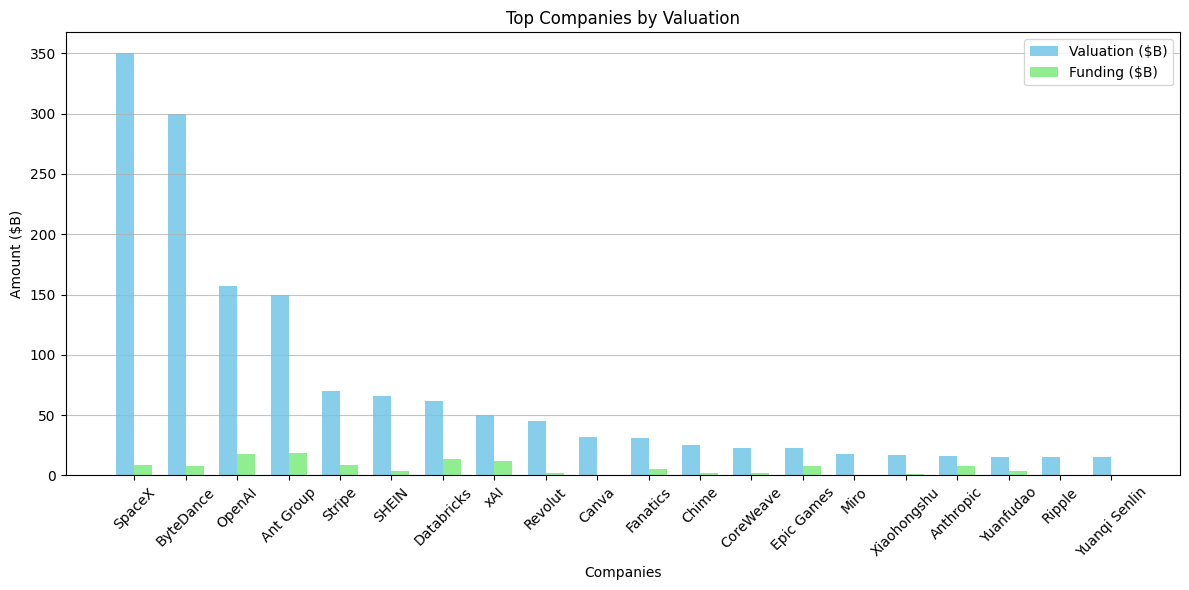

### Companies Received Most Funding

In [ ]:
top_companies = df.sort_values(by='Funding ($B)', ascending=False).head(20)
top_companies


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Company</th>
      <th>Valuation ($B)</th>
      <th>Total Equity Funding ($)</th>
      <th>Unicorn Date</th>
      <th>Date Founded</th>
      <th>Years to Unicorn</th>
      <th>Industry</th>
      <th>Country</th>
      <th>City</th>
      <th>Select Investors</th>
      <th>Unicorn Year</th>
      <th>Funding ($B)</th>
      <th>Years to Unicorn (Months)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>3</th>
      <td>Ant Group</td>
      <td>150.00</td>
      <td>19000000000</td>
      <td>2017-01-01</td>
      <td>2014</td>
      <td>3y</td>
      <td>Financial Services</td>
      <td>China</td>
      <td>Hangzhou</td>
      <td>Alibaba Group, CPP Investments, The Carlyle Group</td>
      <td>2017</td>
      <td>19.0</td>
      <td>36</td>
    </tr>
    <tr>
      <th>2</th>
      <td>OpenAI</td>
      <td>157.00</td>
      <td>18000000000</td>
      <td>2019-07-22</td>
      <td>2015</td>
      <td>4y6m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Dynamo VC, Susa Ventures, Founders Fund</td>
      <td>2019</td>
      <td>18.0</td>
      <td>54</td>
    </tr>
    <tr>
      <th>38</th>
      <td>JUUL Labs</td>
      <td>12.00</td>
      <td>15000000000</td>
      <td>2017-12-20</td>
      <td>2011</td>
      <td>6y11m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Boxin Capital, DT Capital Partners, IDG Capital</td>
      <td>2017</td>
      <td>15.0</td>
      <td>83</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Databricks</td>
      <td>62.00</td>
      <td>14000000000</td>
      <td>2019-02-05</td>
      <td>2013</td>
      <td>6y1m</td>
      <td>Industrials</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Holtzbrinck Ventures, Unternehmertum Venture C...</td>
      <td>2019</td>
      <td>14.0</td>
      <td>73</td>
    </tr>
    <tr>
      <th>7</th>
      <td>xAI</td>
      <td>50.00</td>
      <td>12000000000</td>
      <td>2024-05-26</td>
      <td>2006</td>
      <td>18y4m</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>Burlingame</td>
      <td>Prysm Capital, Baillie Gifford &amp; Co., TDM Grow...</td>
      <td>2024</td>
      <td>12.0</td>
      <td>220</td>
    </tr>
    <tr>
      <th>0</th>
      <td>SpaceX</td>
      <td>350.00</td>
      <td>9000000000</td>
      <td>2012-12-01</td>
      <td>2002</td>
      <td>10y3m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>Hawthorne</td>
      <td>Opus Capital, RRE Ventures, Relay Ventures</td>
      <td>2012</td>
      <td>9.0</td>
      <td>123</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Stripe</td>
      <td>70.00</td>
      <td>9000000000</td>
      <td>2014-01-23</td>
      <td>2009</td>
      <td>5y</td>
      <td>Consumer &amp; Retail</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>Sequoia Capital China, ZhenFund, K2 Ventures</td>
      <td>2014</td>
      <td>9.0</td>
      <td>60</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Anthropic</td>
      <td>16.05</td>
      <td>8000000000</td>
      <td>2023-02-03</td>
      <td>2021</td>
      <td>2y2m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>San Francisco</td>
      <td>New Enterprise Associates, Institutional Ventu...</td>
      <td>2023</td>
      <td>8.0</td>
      <td>26</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ByteDance</td>
      <td>300.00</td>
      <td>8000000000</td>
      <td>2017-04-07</td>
      <td>2011</td>
      <td>6y3m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Breyer Capital, Parkway VC, TIME Ventures</td>
      <td>2017</td>
      <td>8.0</td>
      <td>75</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Epic Games</td>
      <td>22.50</td>
      <td>8000000000</td>
      <td>2018-10-26</td>
      <td>1991</td>
      <td>27y9m</td>
      <td>Financial Services</td>
      <td>United States</td>
      <td>Cary</td>
      <td>Warburg Pincus, The Rise Fund, HarbourVest Par...</td>
      <td>2018</td>
      <td>8.0</td>
      <td>333</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Fanatics</td>
      <td>31.00</td>
      <td>5000000000</td>
      <td>2012-06-06</td>
      <td>2011</td>
      <td>1y5m</td>
      <td>Financial Services</td>
      <td>United States</td>
      <td>Jacksonville</td>
      <td>Liberty City Ventures, RRE Ventures, Mithril C...</td>
      <td>2012</td>
      <td>5.0</td>
      <td>17</td>
    </tr>
    <tr>
      <th>40</th>
      <td>Xingsheng Selected</td>
      <td>12.00</td>
      <td>5000000000</td>
      <td>2020-07-22</td>
      <td>2009</td>
      <td>11y6m</td>
      <td>Media &amp; Entertainment</td>
      <td>China</td>
      <td>Changsha</td>
      <td>Temasek, Guggenheim Investments, Qatar Investm...</td>
      <td>2020</td>
      <td>5.0</td>
      <td>138</td>
    </tr>
    <tr>
      <th>42</th>
      <td>BYJU's</td>
      <td>11.50</td>
      <td>5000000000</td>
      <td>2017-07-25</td>
      <td>2011</td>
      <td>7y8m</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>India</td>
      <td>Bengaluru</td>
      <td>Greylock Partners, Venrock, Providence Ventures</td>
      <td>2017</td>
      <td>5.0</td>
      <td>92</td>
    </tr>
    <tr>
      <th>44</th>
      <td>Global Switch</td>
      <td>11.10</td>
      <td>5000000000</td>
      <td>2016-12-22</td>
      <td>1998</td>
      <td>19y2m</td>
      <td>Enterprise Tech</td>
      <td>United Kingdom</td>
      <td>London</td>
      <td>Jiangsu Shagang Group, IDC, Barclays, Credit S...</td>
      <td>2016</td>
      <td>5.0</td>
      <td>230</td>
    </tr>
    <tr>
      <th>48</th>
      <td>Chehaoduo</td>
      <td>10.00</td>
      <td>4000000000</td>
      <td>2016-03-12</td>
      <td>2014</td>
      <td>2y2m</td>
      <td>Healthcare &amp; Life Sciences</td>
      <td>China</td>
      <td>Beijing</td>
      <td>China Health Industry Investment Fund, China R...</td>
      <td>2016</td>
      <td>4.0</td>
      <td>26</td>
    </tr>
    <tr>
      <th>24</th>
      <td>Anduril</td>
      <td>14.00</td>
      <td>4000000000</td>
      <td>2019-09-11</td>
      <td>2017</td>
      <td>2y8m</td>
      <td>Enterprise Tech</td>
      <td>United States</td>
      <td>Irvine</td>
      <td>Norwest Venture Partners, Goldman Sachs, Dell ...</td>
      <td>2019</td>
      <td>4.0</td>
      <td>32</td>
    </tr>
    <tr>
      <th>23</th>
      <td>Klarna</td>
      <td>14.50</td>
      <td>4000000000</td>
      <td>2011-12-12</td>
      <td>2005</td>
      <td>9y2m</td>
      <td>Enterprise Tech</td>
      <td>Sweden</td>
      <td>Stockholm</td>
      <td>OneVentures, AirTree Ventures, AMP New Ventures</td>
      <td>2011</td>
      <td>4.0</td>
      <td>110</td>
    </tr>
    <tr>
      <th>5</th>
      <td>SHEIN</td>
      <td>66.00</td>
      <td>4000000000</td>
      <td>2018-07-03</td>
      <td>2008</td>
      <td>10y6m</td>
      <td>Financial Services</td>
      <td>Singapore</td>
      <td>Singapore</td>
      <td>369 Growth Partners, GTM Capital, Berkeley Hil...</td>
      <td>2018</td>
      <td>4.0</td>
      <td>126</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Yuanfudao</td>
      <td>15.50</td>
      <td>4000000000</td>
      <td>2017-05-31</td>
      <td>2012</td>
      <td>5y4m</td>
      <td>Enterprise Tech</td>
      <td>China</td>
      <td>Beijing</td>
      <td>Craft Ventures, F-Prime Capital, Sound Ventures</td>
      <td>2017</td>
      <td>4.0</td>
      <td>64</td>
    </tr>
    <tr>
      <th>60</th>
      <td>Northvolt</td>
      <td>9.08</td>
      <td>4000000000</td>
      <td>2019-06-12</td>
      <td>2016</td>
      <td>3y5m</td>
      <td>Industrials</td>
      <td>Sweden</td>
      <td>Stockholm</td>
      <td>Aqua-Spark, Wavemaker Partners, Peak XV Partners</td>
      <td>2019</td>
      <td>4.0</td>
      <td>41</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(top_companies['Company'], top_companies['Funding ($B)'], color='skyblue')
plt.title('Companies Received Most Funding')
plt.xlabel('Amount ($B)')
plt.grid(axis='x', alpha=0.75)
plt.show()


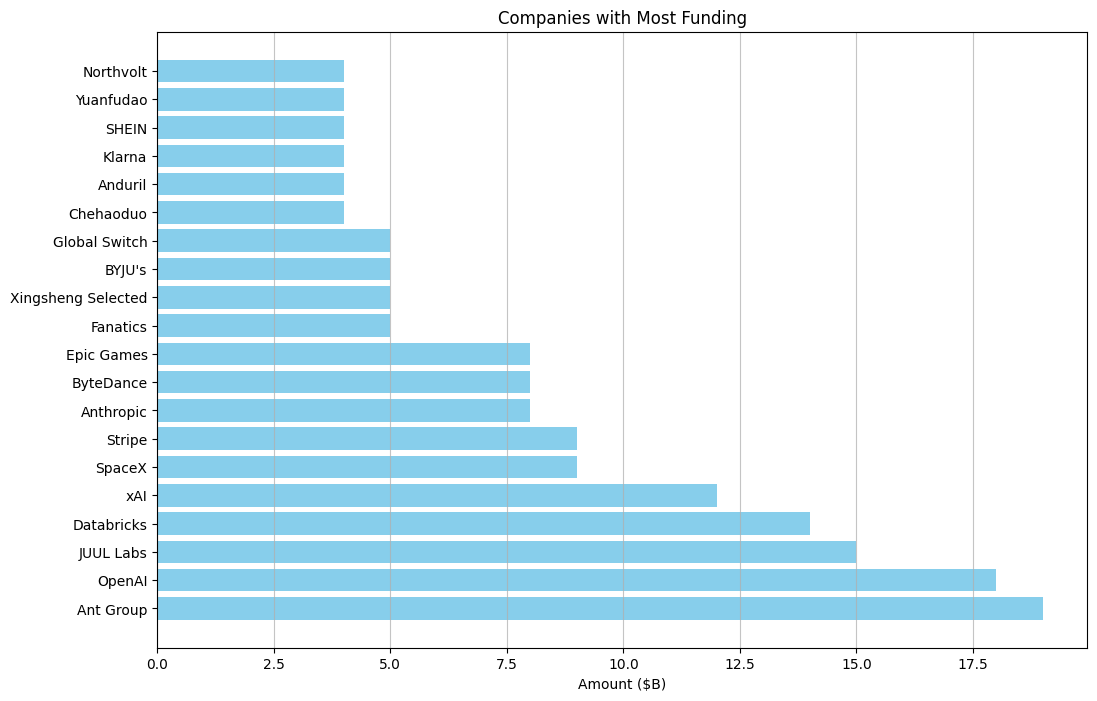

## By Country

In [ ]:
top_countries = df['Country'].value_counts().nlargest(5).index
top_countries


``` example
Index(['United States', 'China', 'India', 'United Kingdom', 'Germany'], dtype='object', name='Country')
```

### Top Countries by Number of Companies

In [ ]:
plt.figure(figsize=(12, 6))
# sns.barplot(x=top_countries.index, y=top_countries)
sns.countplot(x=df['Country'], order=df['Country'].value_counts().nlargest(20).index, palette='husl', hue=df['Country'])

plt.title('Top Countries by Number of Companies')
plt.ylabel('Number of Companies')
plt.xlabel(None)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


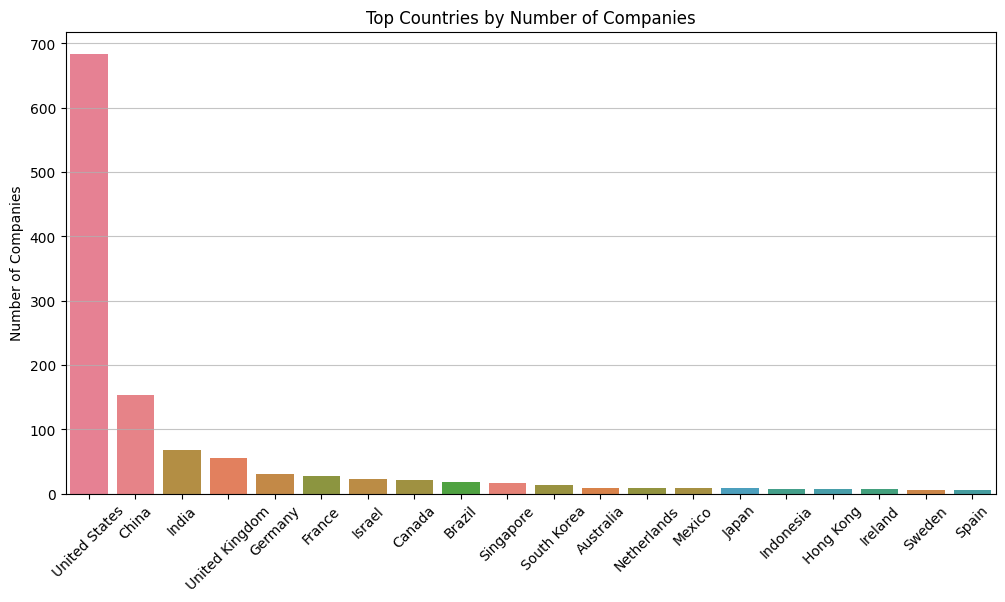

### Top Countries by Number of Companies across Different Industries

In [ ]:
grouped_df = df[df['Country'].isin(top_countries)].groupby(['Country', 'Industry']).size().unstack(fill_value=0)
grouped_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Industry</th>
      <th>Consumer &amp; Retail</th>
      <th>Enterprise Tech</th>
      <th>Financial Services</th>
      <th>Healthcare &amp; Life Sciences</th>
      <th>Industrials</th>
      <th>Insurance</th>
      <th>Media &amp; Entertainment</th>
    </tr>
    <tr>
      <th>Country</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>China</th>
      <td>19</td>
      <td>59</td>
      <td>27</td>
      <td>14</td>
      <td>22</td>
      <td>2</td>
      <td>10</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>7</td>
      <td>10</td>
      <td>2</td>
      <td>3</td>
      <td>8</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>India</th>
      <td>10</td>
      <td>22</td>
      <td>12</td>
      <td>7</td>
      <td>8</td>
      <td>1</td>
      <td>8</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>9</td>
      <td>16</td>
      <td>12</td>
      <td>6</td>
      <td>5</td>
      <td>2</td>
      <td>5</td>
    </tr>
    <tr>
      <th>United States</th>
      <td>116</td>
      <td>214</td>
      <td>128</td>
      <td>68</td>
      <td>94</td>
      <td>15</td>
      <td>49</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
grouped_df.plot(kind='bar', figsize=(12, 8), width=0.8)

plt.title('Number of Companies accross Different Industries')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(ncol=4, loc="upper center", bbox_to_anchor=(0.5,-0.08))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


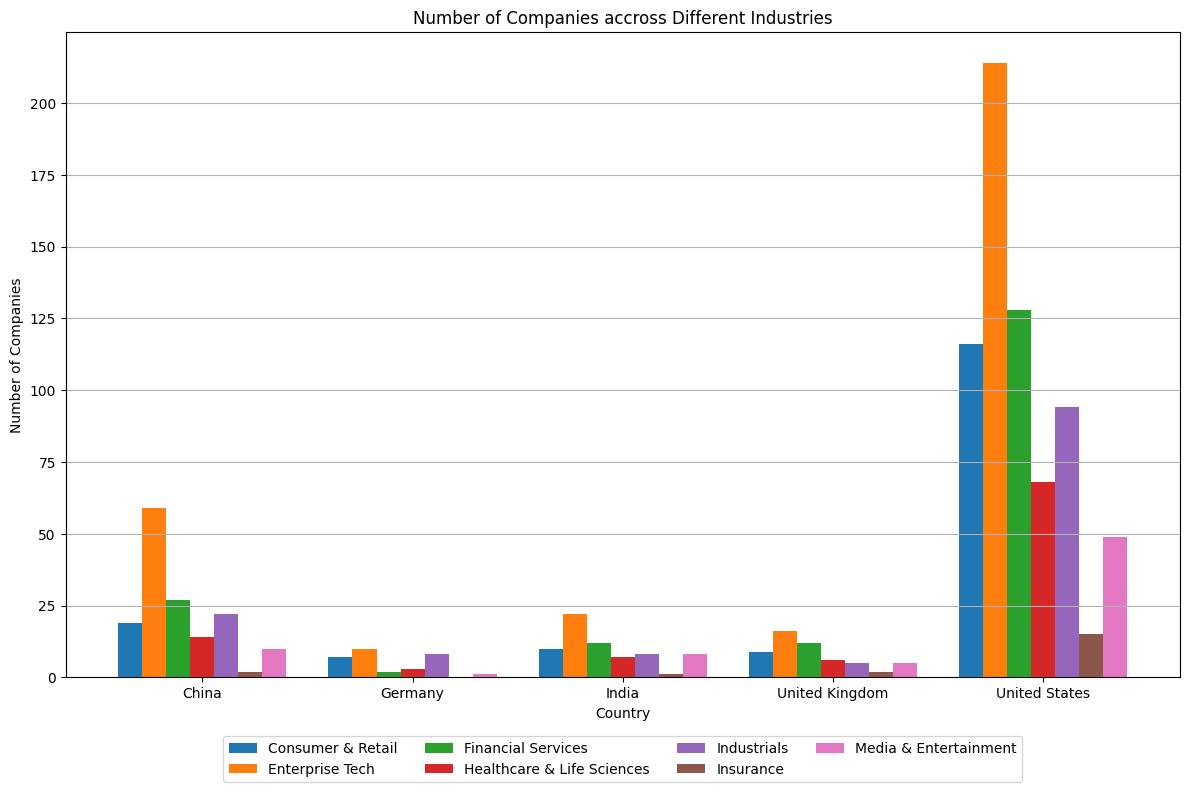

### Top Countries by Company Valuations across Different Industries

In [ ]:
grouped_df = df[df['Country'].isin(top_countries)].groupby(['Country', 'Industry'])['Valuation ($B)'].sum().unstack(fill_value=0)
grouped_df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Industry</th>
      <th>Consumer &amp; Retail</th>
      <th>Enterprise Tech</th>
      <th>Financial Services</th>
      <th>Healthcare &amp; Life Sciences</th>
      <th>Industrials</th>
      <th>Insurance</th>
      <th>Media &amp; Entertainment</th>
    </tr>
    <tr>
      <th>Country</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>China</th>
      <td>47.84</td>
      <td>452.44</td>
      <td>207.12</td>
      <td>33.94</td>
      <td>49.77</td>
      <td>4.93</td>
      <td>39.61</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>22.54</td>
      <td>27.92</td>
      <td>2.07</td>
      <td>17.87</td>
      <td>14.50</td>
      <td>0.00</td>
      <td>1.00</td>
    </tr>
    <tr>
      <th>India</th>
      <td>34.44</td>
      <td>60.65</td>
      <td>19.85</td>
      <td>20.00</td>
      <td>13.01</td>
      <td>3.40</td>
      <td>20.72</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>25.09</td>
      <td>50.58</td>
      <td>27.97</td>
      <td>26.05</td>
      <td>13.56</td>
      <td>46.00</td>
      <td>8.10</td>
    </tr>
    <tr>
      <th>United States</th>
      <td>386.06</td>
      <td>962.37</td>
      <td>343.05</td>
      <td>233.18</td>
      <td>478.08</td>
      <td>55.40</td>
      <td>106.00</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
grouped_df.plot(kind='bar', figsize=(12, 8), width=0.8)

plt.title('Company Valuations accross Different Industries')
plt.xlabel('Country')
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(ncol=4, loc="upper center", bbox_to_anchor=(0.5,-0.08))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


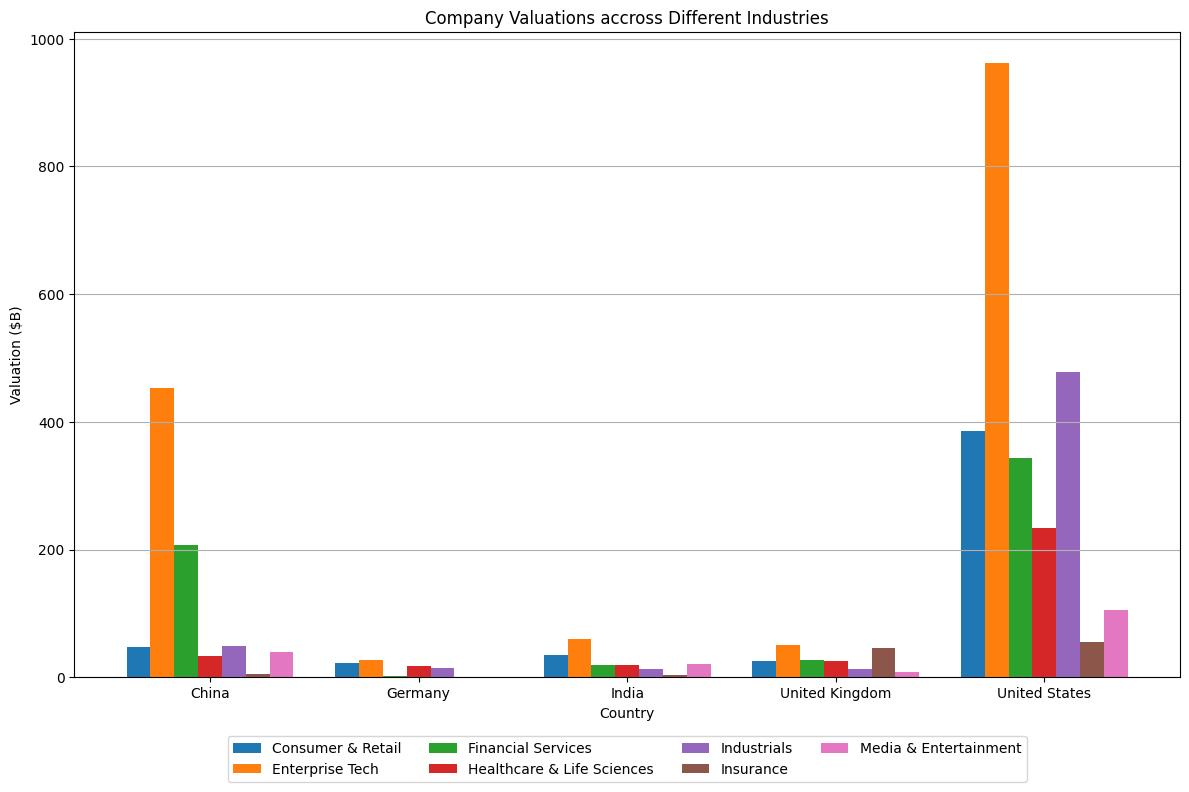

# Time-Based Analysis

## Unicorn Growth Over Time

In [ ]:
unicorn_count = df.groupby(df['Unicorn Date'].dt.year).size()
unicorn_count


``` example
Unicorn Date
2007      1
2011      1
2012      4
2013      4
2014      9
2015     32
2016     17
2017     35
2018     83
2019     85
2020     91
2021    484
2022    252
2023     68
2024     78
dtype: int64
```

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=unicorn_count.index, y=unicorn_count.values, hue=unicorn_count.index, palette='GnBu')
plt.title('Unicorn Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.grid(axis='y', alpha=0.7)
plt.show()


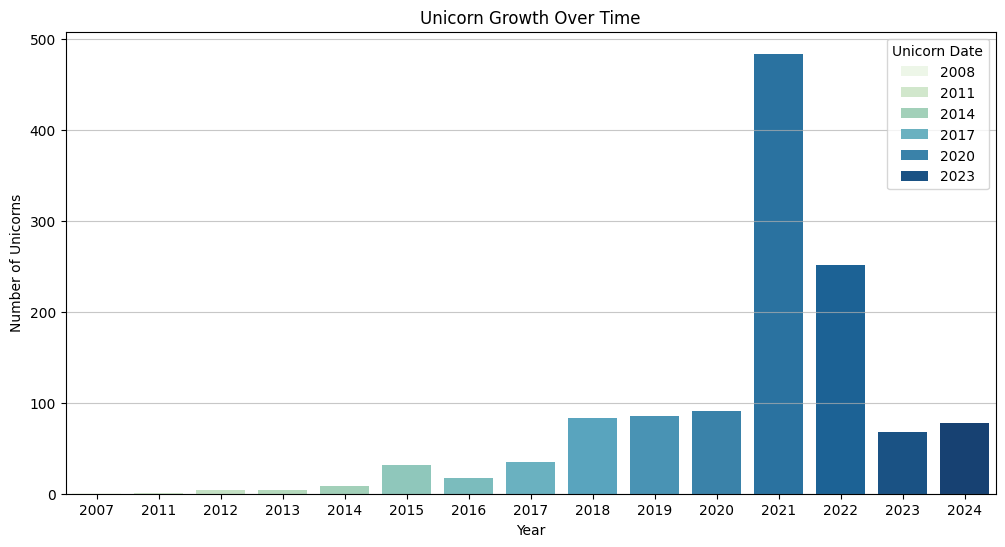

## Time to Unicorn

In [ ]:
# Function to convert "Years to Unicorn" into total months
def convert_years_to_months(years_str):
    if 'y' in years_str and 'm' in years_str:
        years, months = years_str.split('y')
        months = months.replace('m', '').strip()
        return int(years.strip()) * 12 + int(months)
    elif 'y' in years_str:
        years = years_str.replace('y', '').strip()
        return int(years) * 12
    elif 'm' in years_str:
        months = years_str.replace('mo', '').replace('m', '').strip()
        return int(months)
    else:
        return None

df['Years to Unicorn (Months)'] = df['Years to Unicorn'].apply(convert_years_to_months)


In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['Years to Unicorn (Months)'].dropna(), bins=300, color='skyblue')
plt.title('Distribution of Time to Unicorn')
plt.xlabel('Months')
plt.xscale('log')
plt.ylabel('Number of Unicorns')
plt.grid(alpha=0.75)
plt.show()


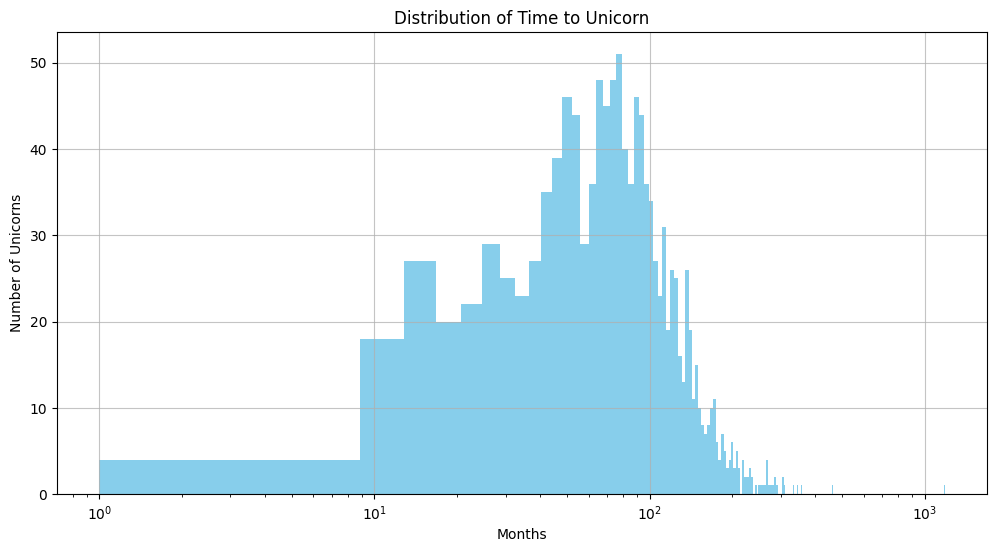

## Distribution of Valuations and Funding Over Time

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Unicorn Year'], df['Valuation ($B)'], alpha=0.6, color='skyblue')
plt.scatter(df['Unicorn Year'], df['Funding ($B)'], alpha=0.6, color='lightgreen')
plt.title('Distribution of Valuations and Funding Over Time')
plt.xlabel('Year')
plt.ylabel('Amount ($B)')
plt.xticks(df['Unicorn Year'].unique(), rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


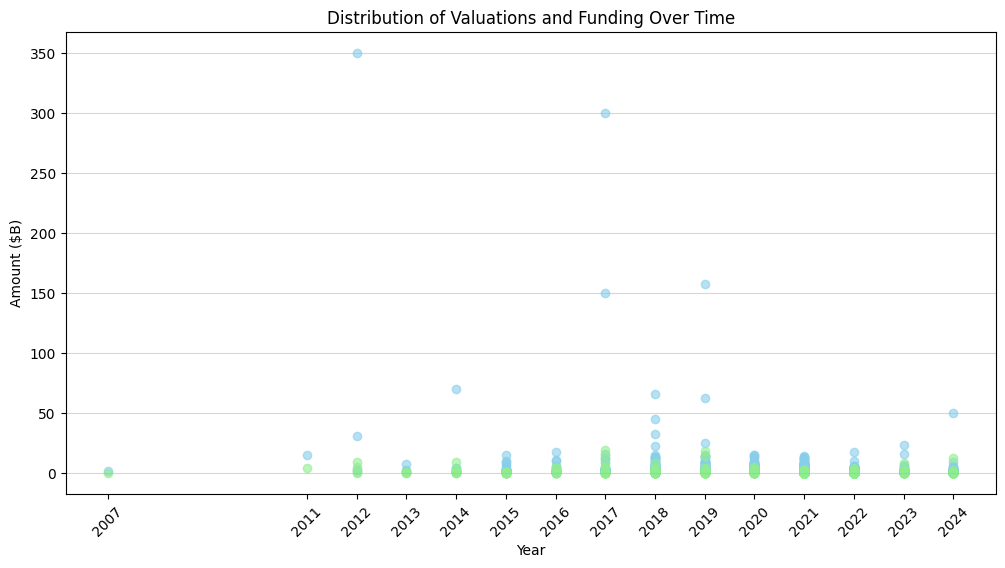

# Correlation Analysis

## Relationship between Funding and Valuation

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Total Equity Funding ($)'], df['Valuation ($B)'] * 1e9, alpha=0.6, color='skyblue')
plt.title('Relationship between Funding and Valuation')
plt.xlabel('Funding ($B)')
plt.ylabel('Valuation ($B)')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.show()


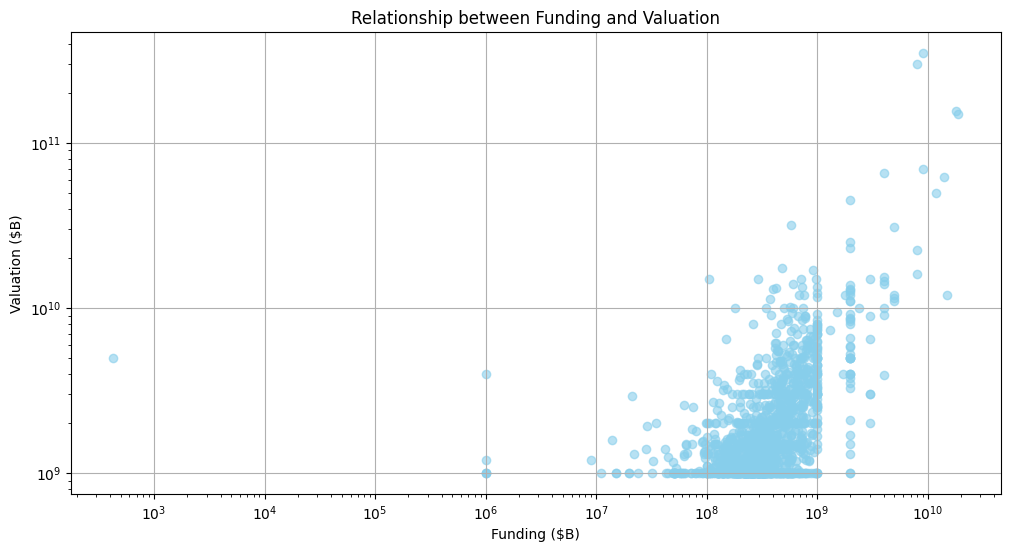

# Historical Analysis

## Survival and Acquisition

1.  Find out companies no longer listed in 2024 unicorn list

    ``` python
    df_2022 = pd.read_csv('input/datasets/Unicorn_Companies (March 2022).csv')
    df_out = df_2022[~df_2022['Company'].str.lower().isin(df['Company'].str.lower())]
    ```

    ``` example
    179 companies no longer listed in 2024 unicorn list
    ```

    ``` python
    df_out.head()
    ```

2.  Financial Stage

    ``` python
    df_out.size()
    ```

    ``` example
    Financial Stage
    Acq            1
    Acquired       7
    Divestiture    1
    IPO            2
    dtype: int64
    ```